<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Deep-CNN-Architecture-Implementation/blob/main/Experiment_Thesis_Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Setup Dataset Path 

In [3]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''


"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [4]:
''' 
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''


" \nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocssing using ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
WIDTH=224
HEIGHT=224

In [9]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.2 ,
                                    zoom_range=0.2,
                                    rotation_range=20,
                                    height_shift_range=0.2,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=1337,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=1337,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [10]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 seed=1337,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [11]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [12]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [13]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

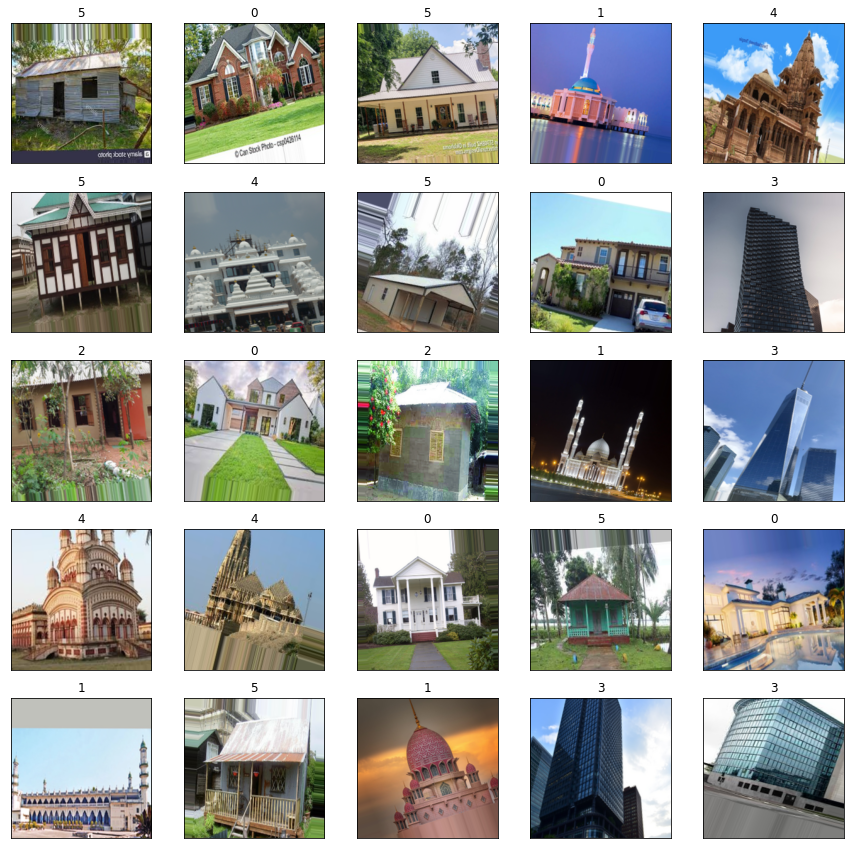

In [14]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

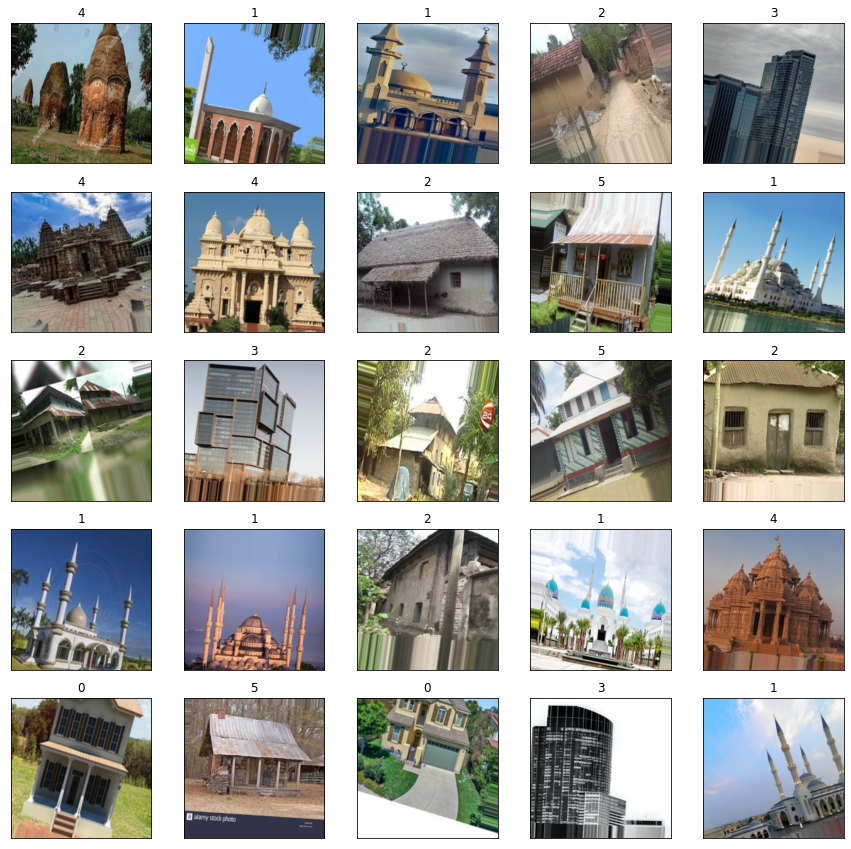

In [15]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Configure the dataset for perfomance

In [17]:
"""
train_ds = train_dataset.prefetch(buffer_size=32)
val_ds = validation_dataet.prefetch(buffer_size=32)
"""

'\ntrain_ds = train_dataset.prefetch(buffer_size=32)\nval_ds = validation_dataet.prefetch(buffer_size=32)\n'

## Define Convolutional Neural Network Architecture

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

In [19]:
inputs = keras.Input(shape=(224,224,3))

x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(64, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

previous_block_activation = x  # Set aside residual



In [20]:
for size in [128, 256, 512, 728]:
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
    residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

    

In [21]:
num_classes=6

In [22]:
x = layers.SeparableConv2D(1024, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.GlobalAveragePooling2D()(x)
if num_classes == 2:
    activation = "sigmoid"
    units = 1
else:
    activation = "softmax"
    units = num_classes

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(units, activation=activation)(x)

## Create Model

In [24]:
model=keras.Model(inputs,outputs,name='classifier')

In [25]:
model.summary()

Model: "classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization[0][0]        
_________________________________________________________________________________________

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/CNN1625119786.png


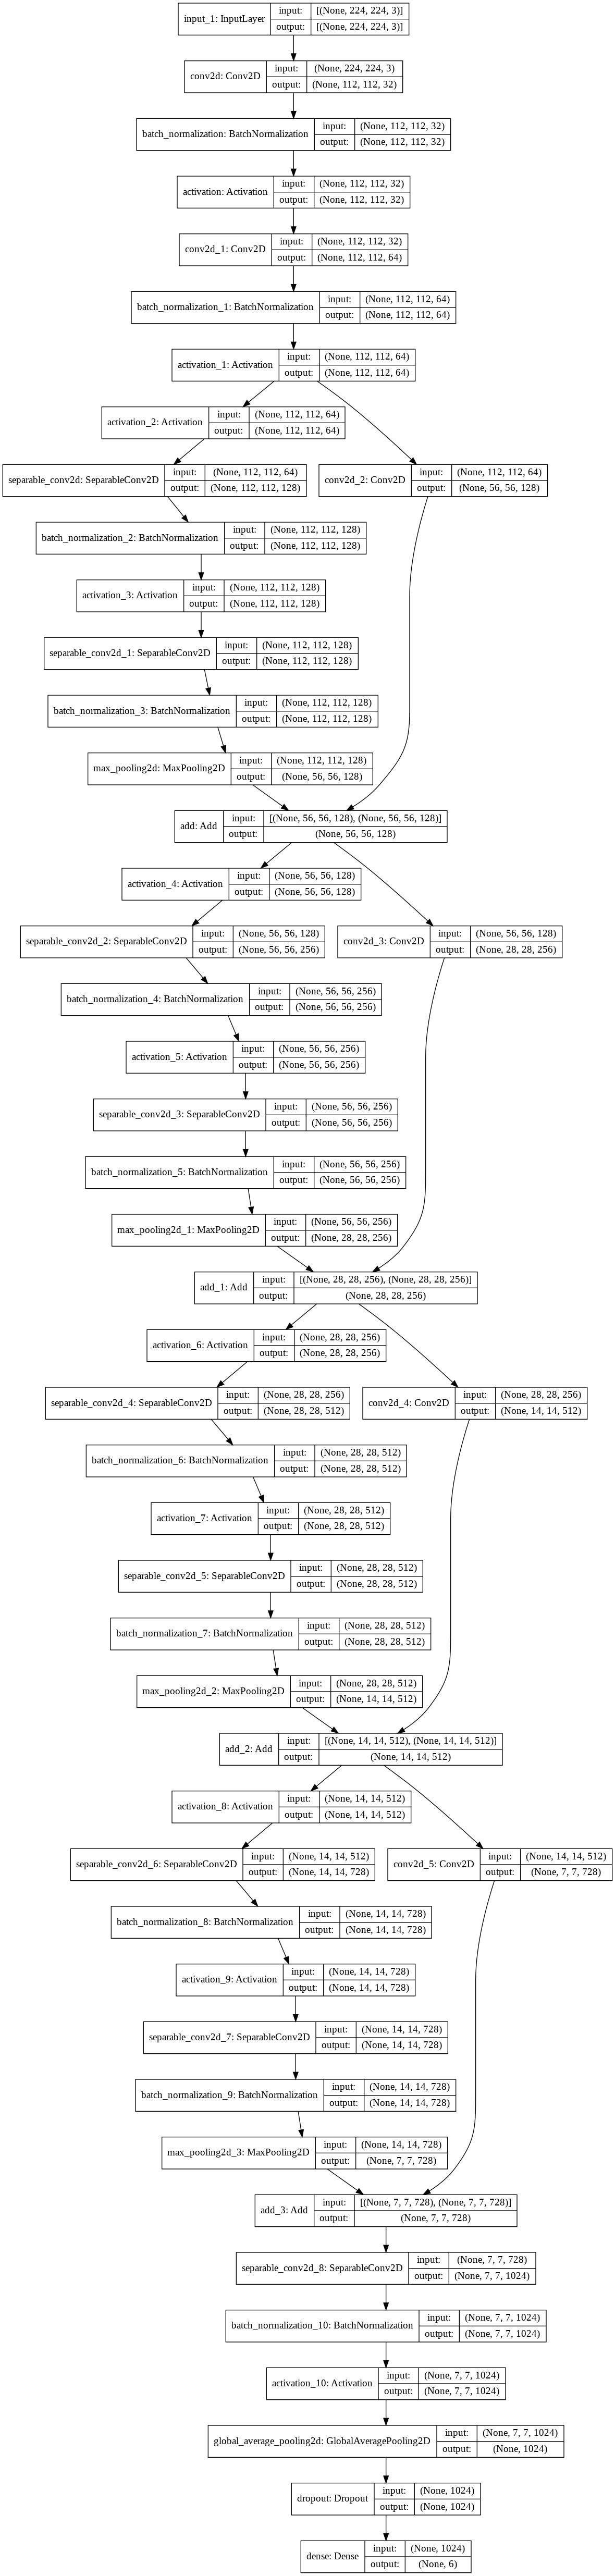

In [26]:
import time
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/CNN'+str(int(t))+'.png'
print(image_name)
keras.utils.plot_model(model,show_shapes=True,to_file=image_name)

## Compile CNN Model

In [27]:
model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])

## Trained  CNN Model

In [28]:
epochs=100
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [29]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [30]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,callbacks=[checkpointer])

Epoch 1/100
30/30 [==============================] - 416s 13s/step - loss: 1.5438 - accuracy: 0.4260 - val_loss: 1.7914 - val_accuracy: 0.1696

Epoch 00001: val_loss improved from inf to 1.79136, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
30/30 [==============================] - 20s 650ms/step - loss: 1.2512 - accuracy: 0.5177 - val_loss: 1.8173 - val_accuracy: 0.1741

Epoch 00002: val_loss did not improve from 1.79136
Epoch 3/100
30/30 [==============================] - 20s 650ms/step - loss: 1.1400 - accuracy: 0.5500 - val_loss: 1.9734 - val_accuracy: 0.1652

Epoch 00003: val_loss did not improve from 1.79136
Epoch 4/100
30/30 [==============================] - 20s 650ms/step - loss: 1.0218 - accuracy: 0.6104 - val_loss: 2.1855 - val_accuracy: 0.1652

Epoch 00004: val_loss did not improve from 1.79136
Epoch 5/100
30/30 [==============================] - 20s 647ms/step - loss: 0.8816 - accuracy: 0.6510 - val_loss: 2.6285 - val_accuracy: 0.1607

Epoch 00005: val_loss did not improve from 1.79136
Epoch 6/100
30/30 [==============================] - 20s 649ms/step - loss: 0.8729 - accuracy: 0.6740 - val_loss: 2.8674 - val_accuracy: 0.1652

Epoch 00006: val_loss did not improve from 1.79136
Epoch 7/100
30/30 [=

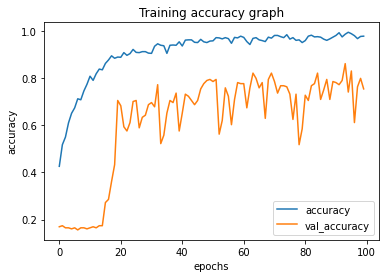

In [31]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

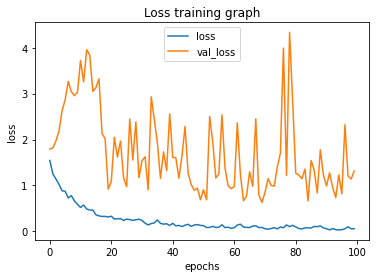

In [32]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Testing the model

In [33]:
test_loss,test_accuracy=model.evaluate(test_dataset)

10/10 [==============================] - 94s 10s/step - loss: 0.8729 - accuracy: 0.7967


In [34]:
print('Accuracy of the model is : ',test_accuracy*100)
print('Loss of the model is : ',test_loss)

Accuracy of the model is :  79.666668176651
Loss of the model is :  0.8729167580604553


## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [35]:
import time
t = time.time()
export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model0.79666668176651_time_1625122360.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Reload the model h5 format

In [36]:
from tensorflow.keras.models import load_model

In [37]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "classifier"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization[0][0]        
_________________________________________________________________________________________

## Check Random Image

In [ ]:
image_batch,label_batch=next(iter(test_dataset))

In [ ]:
label_batch[:5]

In [ ]:
image_batch.shape

In [ ]:
label_batch.shape

In [ ]:
iter(test_dataset)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
test_dataset

## Classification report 

In [38]:
predicted_result=model.predict(test_dataset)
predicted_result[:5]

array([[4.4167450e-10, 1.5800101e-11, 9.9999928e-01, 3.2349141e-16,
        2.2574019e-10, 7.2344659e-07],
       [9.9872905e-01, 3.7909678e-05, 1.3020329e-04, 2.3885457e-14,
        4.8003077e-08, 1.1027711e-03],
       [3.2849791e-03, 1.1583247e-04, 9.9568188e-01, 8.8250960e-07,
        4.7443344e-05, 8.6900959e-04],
       [2.7157375e-04, 2.1177789e-14, 1.0299610e-08, 6.0204921e-15,
        2.7944620e-13, 9.9972838e-01],
       [8.4660506e-01, 8.4065941e-05, 1.6769948e-03, 2.6792921e-10,
        5.2039718e-07, 1.5163332e-01]], dtype=float32)

In [39]:
predicted_result.shape

(300, 6)

In [40]:
predicted_value=np.argmax(model.predict(test_dataset),axis=-1)
predicted_value

array([5, 0, 4, 4, 2, 2, 0, 4, 5, 3, 1, 3, 2, 1, 4, 5, 3, 2, 3, 4, 0, 3,
       1, 1, 2, 3, 5, 0, 2, 5, 5, 2, 0, 3, 4, 0, 5, 0, 5, 0, 5, 2, 5, 3,
       0, 5, 3, 0, 5, 3, 4, 2, 4, 5, 1, 1, 5, 1, 3, 5, 0, 3, 0, 2, 0, 5,
       2, 0, 2, 1, 0, 5, 0, 4, 3, 4, 0, 3, 1, 3, 4, 1, 5, 0, 2, 0, 0, 0,
       1, 4, 1, 0, 2, 5, 2, 2, 1, 0, 5, 5, 5, 2, 4, 3, 3, 2, 4, 5, 1, 0,
       2, 2, 0, 5, 2, 0, 5, 2, 5, 0, 0, 2, 0, 0, 4, 0, 0, 3, 1, 5, 5, 0,
       3, 5, 5, 0, 1, 0, 4, 0, 5, 4, 1, 1, 4, 3, 5, 5, 5, 0, 0, 2, 4, 2,
       0, 1, 0, 0, 0, 4, 0, 1, 0, 3, 1, 5, 1, 3, 3, 5, 2, 0, 0, 2, 3, 5,
       1, 2, 4, 4, 2, 0, 2, 0, 3, 3, 1, 0, 3, 2, 5, 3, 2, 1, 0, 4, 3, 5,
       2, 2, 3, 5, 0, 3, 4, 5, 2, 2, 3, 0, 5, 5, 4, 3, 0, 5, 1, 5, 3, 3,
       1, 3, 0, 2, 2, 1, 3, 1, 5, 1, 5, 0, 0, 1, 1, 4, 4, 3, 1, 4, 2, 1,
       2, 5, 5, 5, 0, 2, 3, 1, 3, 3, 5, 0, 3, 3, 3, 5, 5, 2, 4, 0, 2, 2,
       4, 4, 0, 3, 1, 0, 3, 1, 2, 3, 3, 0, 2, 2, 0, 0, 2, 2, 4, 2, 5, 1,
       3, 3, 5, 5, 2, 1, 1, 5, 2, 2, 2, 5, 2, 0])

In [41]:
test_value=test_dataset.classes
test_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], d

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_dataset.classes,predicted_value))

Accuracy score:  0.16


In [43]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(test_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.15      0.20      0.17        50
           1       0.23      0.18      0.20        50
           2       0.13      0.14      0.13        50
           3       0.18      0.18      0.18        50
           4       0.16      0.10      0.12        50
           5       0.14      0.16      0.15        50

    accuracy                           0.16       300
   macro avg       0.16      0.16      0.16       300
weighted avg       0.16      0.16      0.16       300



## Another approach to calculate the classification report

In [ ]:
predicted_array=model.predict(validation_dataset)
predicted_array